<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Tarea opcional </h1>
    <h2> Profesor: Ricardo Ñanculef y Francisco Mena </h2>
    <h3> Ayudante: Jorge Ludueña </h3>
    <h4> Alumno: Josué Venegas Almonacid; Rol: 201873534-5 </h4>
    <h5> Video: https://youtu.be/ESCYyvjggdQ </h5>
</center>
<p>
<center><h4>2020-2</h4></center>
</p>

# Marcar y recuperar

Marcar y recuperar es un método comúnmente usado en ecología para **estimar el tamaño de una población** animal donde no es práctico contar a cada individuo. Una parte de la población es capturada, marcada y liberada. Posteriormente, se capturará otra porción y se contará el número de individuos marcados dentro de la muestra. Dado que el número de individuos marcados dentro de la segunda muestra debe ser **proporcional** al número de individuos marcados en toda la población, se puede obtener una estimación del tamaño total de la población dividiendo el número de individuos marcados encontrados por la proporción de individuos marcados en la segunda muestra.

## Método de Petersen

El método Lincoln-Petersen se puede utilizar para estimar el tamaño de la población si solo se realizan dos visitas al área de estudio. Este método asume que:
- Todos los individuos dentro de una misma población tienen la misma probabilidad de ser capturados. No hay ninguno que sea más propenso a caer en las trampas o que las eluda con mayor probabilidad.
- La proporción de animales marcados respecto de los no marcados se mantiene constante a lo largo del tiempo desde el momento de la captura hasta el momento de la recaptura.
- Los individuos marcados, una vez liberados, se redistribuyen de manera homogénea entre la población de individuos no marcados, de la misma manera que lo estaban antes de ser capturados.
- Los animales marcados no pierden sus marcas.
- La población es cerrada. Es decir, durante el periodo de muestreo no se dan fenómenos de emigración o inmigración.

Dadas esas condiciones, el tamaño de población estimado es:

$$\hat {N}= \frac{n \cdot m}{k}$$

Donde:  
n = Número de animales marcados en la primera visita  
m = Número de animales capturados en la segunda visita  
k = Número de animales recapturados (es decir, capturados en la segunda visita y que estaban marcados de la primera visita)

## La loica de pecho colorado

La *“Loica de pecho colorado”* o *Leistes loyca* es una especie de ave paseriforme de la familia *Icteridae*, propia del cono sur americano. Suponga que se necesita estimar la cantidad de ejemplares de este animal (N) presentes en un parque del sur de Chile. Para ello, se capturan n = 50 loicas y se marcan insertando un pequeño anillo en su pata derecha. Algunos días más tarde, se capturan m = 100 loicas y se encuentra que k = 10 están marcadas. Asumiendo que las aves se distribuyen de manera uniforme en el parque y que la población se ha mantenido invariante:

(a) Demuestre experimentalmente que el estimador de momentos  

$$\hat N = \frac {n \cdot m}{k}$$  

es el estimador máximo verosímil de N. Para ello, grafique la función de verosimilitud como función de N y verifique que se obtiene un máximo en  

$$N = \frac{n \cdot m}{k}$$

**Respuesta**:  Vemos que n y m son determinados por el experimento, mientras que k es una observación que puede variar.

La función verosimilitud de N es la distribución geométrica:  

$$ L(N|k) = \frac { {n \choose k} {N-n \choose m-k} } { {N \choose m} } $$

Donde:  
n = Número de animales marcados en la primera visita  
m = Número de animales capturados en la segunda visita  
k = Número de animales recapturados (que fueron marcados en la primera visita)  
N = Población total

Población estimada = 500


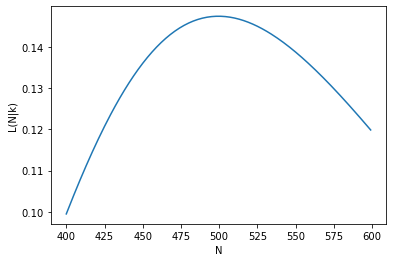

Máximo obtenido = 0.147
Con N = 500


In [143]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Estimamos la población
n = 50
m = 100
k = 10

N_est = int(n*m/k)
print("Población estimada =", N_est)

# Calculamos el valor según la función de verosimilitud
# Intervalo x, con la población estimada perteneciente a él
valores = np.arange(N_est-100, N_est+100)
# Valores f(x)
imagenes = []
#Guardaremos el máximo y su posición para compararlo con la población estimada anteriormente
max = -1
pos = 0

#Por cada x, calculo su f(x)
for N in valores:
    num1 = math.comb(n, k)
    num2 = math.comb(N-n, m-k)
    num3 = math.comb(N, m)
    f = num1*num2/num3
    #Lo agrego a la lista de imágenes
    imagenes.append(f)
    
    #Guardo el mayor y su N asociado
    if f>max:
        max = f
        pos = N+1

plt.plot(valores, imagenes)
plt.xlabel("N")
plt.ylabel("L(N|k)")
plt.show()

#Comprobamos que N es máximo con N =nm/k
print(f"Máximo obtenido = {round(max,3)}\nCon N = {pos}")

(b) Fije N = 550, n = 50 y m = 100. Simule el proceso de marcado y recaptura, calculando el valor de k en cada simulación, es decir contando cuántas de las m loicas capturadas la segunda vez están marcadas. Junto con k, calcule también el valor de $\hat N$ obtenido en cada simulación. Finalmente, use los valores empíricos de $\hat N$  para estimar la distribución de muestreo del estimador (haga el gráfico).

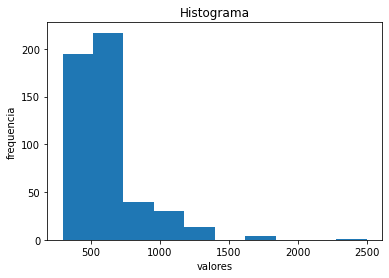

In [244]:
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics

def simular(historial_recapturados, historial_estimaciones):    
    #Parámetros
    #N: población total
    #n: marcados en primera visita
    #m: capturados en segunda visita
    [N, n, m] = [550, 50, 100]

    #k: recapturados (capturados en segunda visita que ya estaban marcados de la primera)
    k = 0

    #Muestra vacía
    birds = []
    elegidos = []

    #Primera visita: Marco n aves
    for i in range(n):
        birds.append(1)

    #Dejo sin marcar N-n aves. De esta forma tengo N ejemplares
    for i in range(N-n):
        birds.append(0)

    #Segunda visita: De los N ejemplares, selecciono m
    for i in range(m):
        posicion = random.randint(0, N-1)
        #Me aseguro de no seleccionar repetidos
        while (posicion in elegidos):
            posicion = random.randint(0, N-1)
        #Lo guardo en una lista para no volver a seleccionarlo
        elegidos.append(posicion)
        #Anoto si estaba marcado
        k += birds[posicion]

    #Calculo la estimación de esta simulación
    Nest = int(n*m/k)
    #Agrego la cantidad de aves recapturadas de esta simulación y su estimación de población correspondiente
    historial_recapturados.append(k)
    historial_estimaciones.append(Nest)

    
#Historiales vacíos
historial_recapturados = []
historial_estimaciones = []

#Hago la simulación 500 veces
for i in range(500):
    simular(historial_recapturados, historial_estimaciones)

#Histograma
cuenta, cajas, ignorar = plt.hist(historial_estimaciones)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

(c) Use su simulación para estimar el sesgo y la varianza de $\hat N$

In [235]:
import statistics
varianza = round(statistics.variance(historial_estimaciones), 2)
print("Varianza:", varianza)

esperanza = round(m*n/N, 2)
print("Valor esperado:", esperanza)

media = statistics.mean(historial_estimaciones)
print("Media:", media)

Varianza: 44446.95
Valor esperado: 9.09
Media: 607.766


## Referencias

1. Wikipedia. (s. f.). Marcar y recuperar. Wikipedia, la enciclopedia libre. Recuperado 6 de diciembre de 2020, de https://es.wikipedia.org/wiki/Marcar_y_recuperar
2. Aplicaciones de la probabilidad discreta uniforme. (s. f.). Intranet - Universidad de Antofagasta. Recuperado 6 de diciembre de 2020, de https://intranetua.uantof.cl/facultades/csbasicas/Matematicas/academicos/emartinez/Estadistica/mt435/lincoln/index.html
3. Fernández, J. L., & Fernández, P. (s. f.). Notas de Estadística I, Capítulo 5. Departamento de Matemáticas UAM. http://verso.mat.uam.es/~pablo.fernandez/5-estimacion-parte1-curso17-18.pdf
4. Ortiz, M. T. (s. f.). 9.1 Máxima verosimilitud. Estadística Computacional. https://tereom.github.io/est-computacional-2018/maxima-verosimilitud.html
5. Watkins, J. C. (2011, 1 noviembre). Topic 15: Maximum Likelihood Estimation. Math Arizona. https://www.math.arizona.edu/~jwatkins/o-mle.pdf
6. Barbero, M. P. (2017). Muestreo de captura-recaptura: Diseño, estimación y análisis de librerías en R. Universidad de Sevilla. https://idus.us.es/bitstream/handle/11441/77574/Pozo%20Barbero%20Manuel%20TFG.pdf?sequence=1&isAllowed=y